# **Series de Tiempo - Determinacion del flujo vehicular**

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Se tomrán los datos del dataset brindado por el Gobierno de la Ciudad Buenos Aires de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa).  Se utilizarán los años 2017, 2018 y 2019 para analizar el flujo vehicular de la autopista Illia y predecir el mismo para el ultimo trimestre de 2019.**


El proyecto se encuentra estructurado de acuerdo a los siguienes ejes:
#### Exploración de datos


#### Componentes estacionales y tendencia de la serie


#### Predicción a Futuro


### 1. Preparación del Dataset

In [ ]:
#Instaladores
#!pip install statsmodels

#!pip install pycaret

#%matplotlib inline

In [ ]:
#Se importan las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datetime as dt

# Para evaluar la tendencia y la componente estacionadaria.

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Importamos librerías para hacer una regresión lineal
from sklearn.linear_model import LinearRegression

# Importamos librería pycaret con el módulo de detección de anomalías anomaly

from pycaret.anomaly import *

#Correlaciones
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf

import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [ ]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [ ]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Se analizan que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [ ]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [ ]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [ ]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Entonces, los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Filtro los datos a la autopista **Illia** y la forma de pago **Efectivo**


In [ ]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           238869 non-null  object
 1   hora_fin        238869 non-null  int64 
 2   dia             238869 non-null  object
 3   sentido         238869 non-null  object
 4   tipo_vehiculo   238869 non-null  object
 5   cantidad_pasos  238869 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 12.8+ MB


fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [ ]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

In [ ]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

fecha  hora_fin      dia    sentido tipo_vehiculo  \
0       2017-01-01         0  Domingo     Centro       Liviano   
1       2017-01-01         2  Domingo  Provincia       Liviano   
2       2017-01-01         2  Domingo  Provincia       Liviano   
3       2017-01-01         0  Domingo     Centro        Pesado   
4       2017-01-01         0  Domingo     Centro        Pesado   
...            ...       ...      ...        ...           ...   
238864  2019-12-31         7   Martes  Provincia        Pesado   
238865  2019-12-31         7   Martes  Provincia       Liviano   
238866  2019-12-31         7   Martes     Centro        Pesado   
238867  2019-12-31         6   Martes  Provincia       Liviano   
238868  2019-12-31         6   Martes  Provincia        Pesado   

        cantidad_pasos              fecha2  
0                  857 2017-01-01 00:00:00  
1                  561 2017-01-01 02:00:00  
2                   12 2017-01-01 02:00:00  
3                    1 2017-01-01 00:00:00  
4                   21 2017-01-01 00:00:00  
...                ...                 ...  
238864               6 2019-12-31 07:00:00  
238865             276 2019-12-31 07:00:00  
238866              16 2019-12-31 07:00:00  
238867             224 2019-12-31 06:00:00  
238868               6 2019-12-31 06:00:00  

[238869 rows x 7 columns]

In [ ]:
#Cambiamos el tipo de dato a fecha para poder operar con él
dataset['fecha'] = pd.to_datetime(dataset['fecha'])

In [ ]:
# dataset.to_csv('dataset_tp4.csv',index=False)

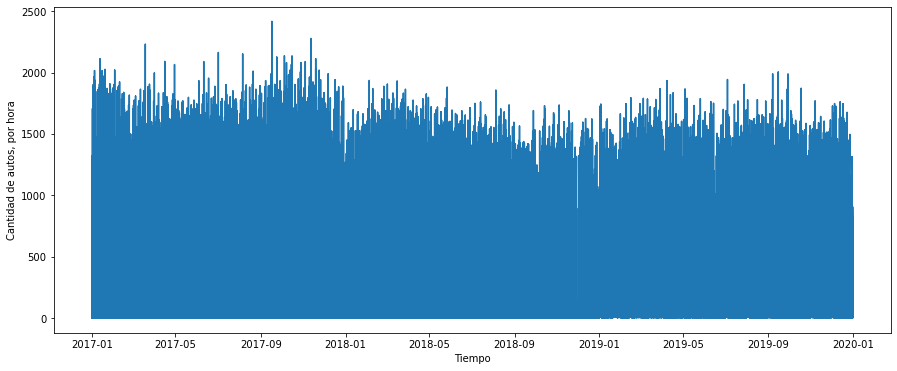

In [ ]:
#Graficamos nuestros datos, tal como están (ILLIA - EFECTIVO)
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 2)


hora_fin  cantidad_pasos
fecha                               
2017-01-01      2976           31183
2017-01-02      3713           51568
2017-01-03      3573           51093
2017-01-04      3909           53332
2017-01-05      3820           56486

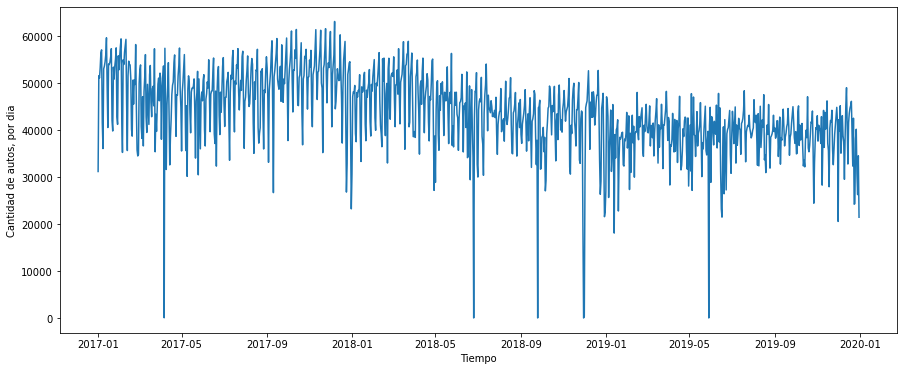

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### **Analisis exploratorio de datos**

En un primer acercamiento a los datos considero que al tener 3 años de datos, son aproximadamante 1000 dias, con registros de las 24 horas del dia, es recomendable graficar a periodos de tiempo mas acotados para lograr una mejor visualizacion y obtener insights.

In [ ]:
liviano= dataset[dataset.tipo_vehiculo=='Liviano']
diario_liv = liviano.resample('D', on = 'fecha').sum()
print(diario_liv.shape)
diario_liv.head()

(1095, 2)


hora_fin  cantidad_pasos
fecha                               
2017-01-01      1118           30641
2017-01-02      1121           48979
2017-01-03      1104           48322
2017-01-04      1104           50581
2017-01-05      1104           53622

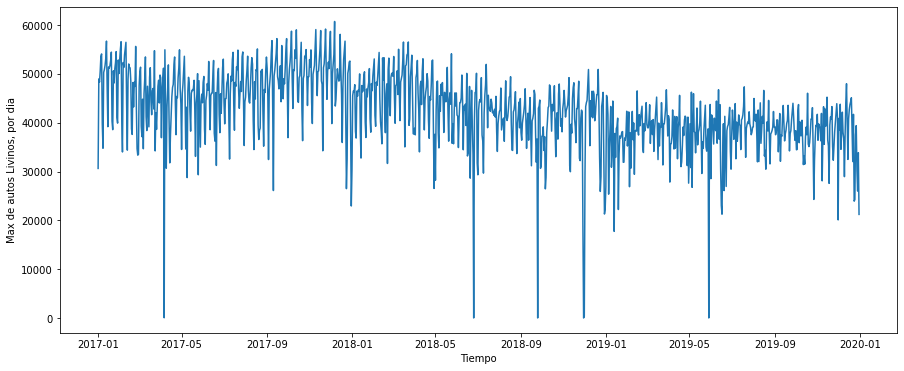

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario_liv.index, diario_liv.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Max de autos Livinos, por dia')
plt.show()

Se observan dias donde existen valores de vehiculos que pasan por el peaje muy alejados de lo esperado. Se analizará luego si corresponden a outliers.

In [ ]:
pesado= dataset[dataset.tipo_vehiculo=='Pesado']
pesado

fecha  hora_fin      dia    sentido tipo_vehiculo  cantidad_pasos  \
3      2017-01-01         0  Domingo     Centro        Pesado               1   
4      2017-01-01         0  Domingo     Centro        Pesado              21   
5      2017-01-01         0  Domingo     Centro        Pesado              10   
6      2017-01-01         0  Domingo     Centro        Pesado               1   
8      2017-01-01         2  Domingo  Provincia        Pesado               5   
...           ...       ...      ...        ...           ...             ...   
238860 2019-12-31         8   Martes  Provincia        Pesado              11   
238862 2019-12-31         8   Martes     Centro        Pesado               9   
238864 2019-12-31         7   Martes  Provincia        Pesado               6   
238866 2019-12-31         7   Martes     Centro        Pesado              16   
238868 2019-12-31         6   Martes  Provincia        Pesado               6   

                    fecha2  
3      2017-01-01 00:00:00  
4      2017-01-01 00:00:00  
5      2017-01-01 00:00:00  
6      2017-01-01 00:00:00  
8      2017-01-01 02:00:00  
...                    ...  
238860 2019-12-31 08:00:00  
238862 2019-12-31 08:00:00  
238864 2019-12-31 07:00:00  
238866 2019-12-31 07:00:00  
238868 2019-12-31 06:00:00  

[151521 rows x 7 columns]

In [ ]:
diario_pes = pesado.resample('D', on = 'fecha').max()
print(diario_pes.shape)
diario_pes.head()

(1095, 7)


fecha  hora_fin        dia    sentido tipo_vehiculo  \
fecha                                                                 
2017-01-01 2017-01-01      23.0    Domingo  Provincia        Pesado   
2017-01-02 2017-01-02      23.0      Lunes  Provincia        Pesado   
2017-01-03 2017-01-03      23.0     Martes  Provincia        Pesado   
2017-01-04 2017-01-04      23.0  Miércoles  Provincia        Pesado   
2017-01-05 2017-01-05      23.0     Jueves  Provincia        Pesado   

            cantidad_pasos              fecha2  
fecha                                           
2017-01-01            27.0 2017-01-01 23:00:00  
2017-01-02            83.0 2017-01-02 23:00:00  
2017-01-03            84.0 2017-01-03 23:00:00  
2017-01-04            83.0 2017-01-04 23:00:00  
2017-01-05            86.0 2017-01-05 23:00:00

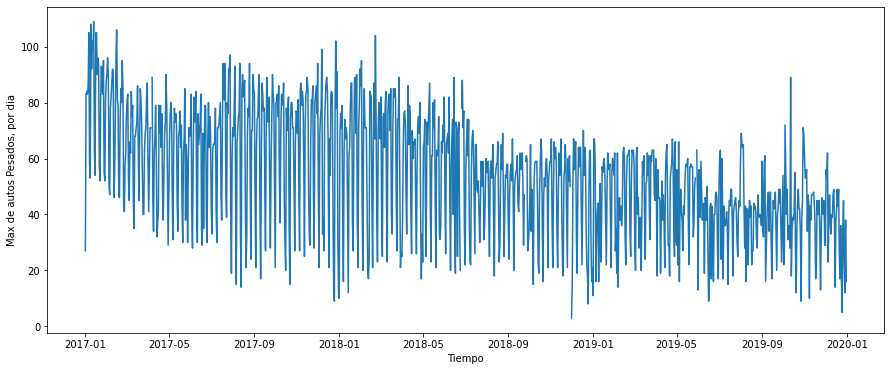

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario_pes.index, diario_pes.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Max de autos Pesados, por dia')
plt.show()

## FUNCIÓN RESAMPLE

Hace un resampleo de los datos usando alguna función de agregación como la suma o el promedio.

In [ ]:
# Para aplicar la función resample necesitamos que la columna sobre la cual vamos a trabajar sea de tipo datetime

dataset['fecha2']=pd.to_datetime(dataset['fecha2'])

## Resampleo por dia

In [ ]:
# Seleccionamos las columnas que serán de interés. En esta caso "cantidad_pasos" y la columna fecha2 sobre la cual resamplear

dataset_selection = dataset[['fecha2','cantidad_pasos']]

# Aplicamos la función resample agrupando por mes quedándonos con la suma mensual de vehículos que pasan

dataset_diario = dataset_selection.resample('D',on='fecha2').sum()


In [ ]:
# Renombramos la columna

dataset_diario = dataset_diario.rename(columns={'cantidad_pasos': 'Total Vehículos Diarios'})
dataset_diario.head(5)

Total Vehículos Diarios
fecha2                             
2017-01-01                    31183
2017-01-02                    51568
2017-01-03                    51093
2017-01-04                    53332
2017-01-05                    56486

In [ ]:
# Renombramos la columna

dataset_diario = dataset_diario.rename(columns={'cantidad_pasos': 'Total Vehículos Diarios'})
dataset_diario.head(5)

Total Vehículos Diarios
fecha2                             
2017-01-01                    31183
2017-01-02                    51568
2017-01-03                    51093
2017-01-04                    53332
2017-01-05                    56486

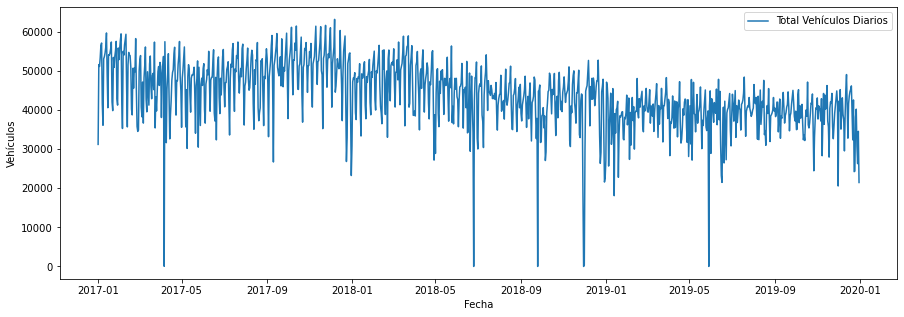

In [ ]:
# Realizamos una gráfica del promedio diario de vehículos

plt.figure(figsize = (15,5))
plt.plot(dataset_diario.index, dataset_diario['Total Vehículos Diarios'], label = 'Total Vehículos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Vehículos')
plt.legend()
plt.show()

## Resampleo por mes

In [ ]:
# Seleccionamos las columnas que serán de interés. En esta caso "cantidad_pasos" y la columna fecha2 sobre la cual resamplear

dataset_selection = dataset[['fecha2','cantidad_pasos']]

# Aplicamos la función resample agrupando por mes quedándonos con la suma mensual de vehículos que pasan

dataset_mensual = dataset_selection.resample('M',on='fecha2').sum()


In [ ]:
# Renombramos la columna

dataset_mensual = dataset_mensual.rename(columns={'cantidad_pasos': 'Total Vehículos Mensuales'})
dataset_mensual.head(5)

Total Vehículos Mensuales
fecha2                               
2017-01-31                    1565260
2017-02-28                    1363113
2017-03-31                    1451214
2017-04-30                    1373985
2017-05-31                    1407136

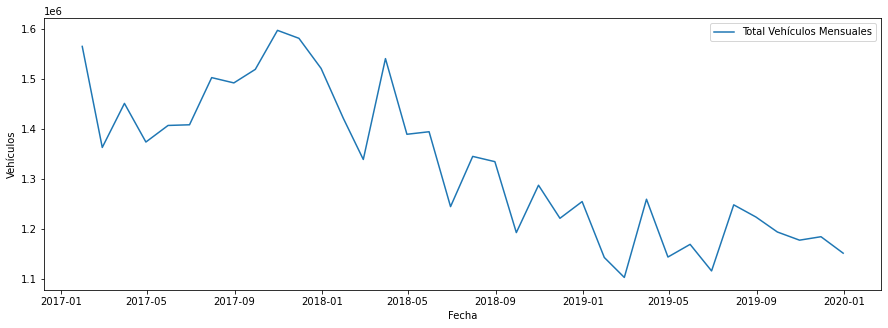

In [ ]:
# Realizamos una gráfica del promedio mensual de vehículos

plt.figure(figsize = (15,5))
plt.plot(dataset_mensual.index, dataset_mensual['Total Vehículos Mensuales'], label = 'Total Vehículos Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Vehículos')
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(-10,40)
plt.legend()
plt.show()

In [ ]:
# Seleccionamos las columnas que serán de interés. En esta caso "cantidad_pasos" y la columna fecha2 sobre la cual resamplear

dataset_selection = dataset[['fecha2','cantidad_pasos']]

# Aplicamos la función resample agrupando por mes quedándonos con la suma mensual de vehículos que pasan

dataset_tri = dataset_selection.resample('Q',on='fecha2').sum()


In [ ]:
# Renombramos la columna

dataset_tri = dataset_tri.rename(columns={'cantidad_pasos': 'Total Vehículos Trimestrales'})
dataset_tri.head(5)

Total Vehículos Trimestrales
fecha2                                  
2017-03-31                       4379587
2017-06-30                       4189585
2017-09-30                       4514379
2017-12-31                       4699961
2018-03-31                       4301592

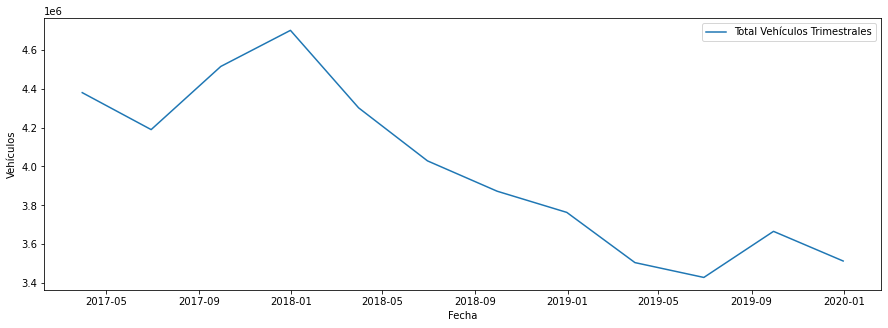

In [ ]:
# Realizamos una gráfica del promedio mensual de vehículos

plt.figure(figsize = (15,5))
plt.plot(dataset_tri.index, dataset_tri['Total Vehículos Trimestrales'], label = 'Total Vehículos Trimestrales')
plt.xlabel('Fecha')
plt.ylabel('Vehículos')
plt.legend()
plt.show()

### Componentes estacionales y tendencia de la serie

Utilizaremos la libreria statsmodels para analizar la estacionalidad

In [ ]:
# Resampleamos la señal por semanas

dataset_selection = dataset[['fecha2','cantidad_pasos']]
dataset_semanal = dataset_selection.resample('W',on='fecha2').sum()


In [ ]:
# Aplicamos el test de estacionalidad

result = adfuller(dataset_semanal['cantidad_pasos'])
print('Adataset Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

Adataset Test Statistic: -0.23
5% Critical Value: -2.88
p-value: 0.94


Se concluye del analisis que es una serie no estacionaria (p-value>0.05)

## Descomposición en tendencia y estacionalidad

Nos basamos en el siguiente modelo


### y(t) = Level + Trend + Seasonality + Noise

Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.

Tendencia - El comportamiento a largo plazo de la serie.

La tendencia no necesariamente tiene por qué ser lineal.

Estacionalidad - Cuando existen ciertos efectos sobre la serie
que se repiten regularmente (alrededor de la misma fecha, por
ejemplo) decimos que es un efecto estacional.

Ruido y Anomalías - En general, lo que no entra dentro de las
componentes anteriores. Acá entran los valores atípicos (outliers)

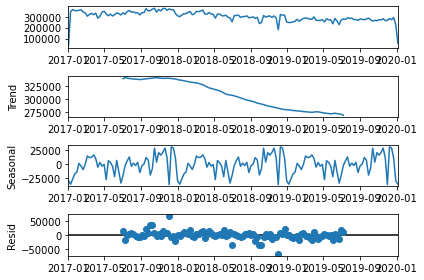

In [ ]:
# Resampleamos la señal por semanas

dataset_selection = dataset[['fecha2','cantidad_pasos']]
dataset_semanal = dataset_selection.resample('W',on='fecha2').sum()

# Utilizamos la función para descomponer la señal. Modelo aditivo

result = seasonal_decompose(dataset_semanal, model='additive')
result.plot()
pyplot.show()

Puede verse la tendencia decreciente. Esto puede validarse si se han pasado a otro método de pago.

## Media movil con Pandas para visualizar tendencias

Observaremos la tendencia y filtraremos el ruido.

Text(0, 0.5, 'Vehículos')

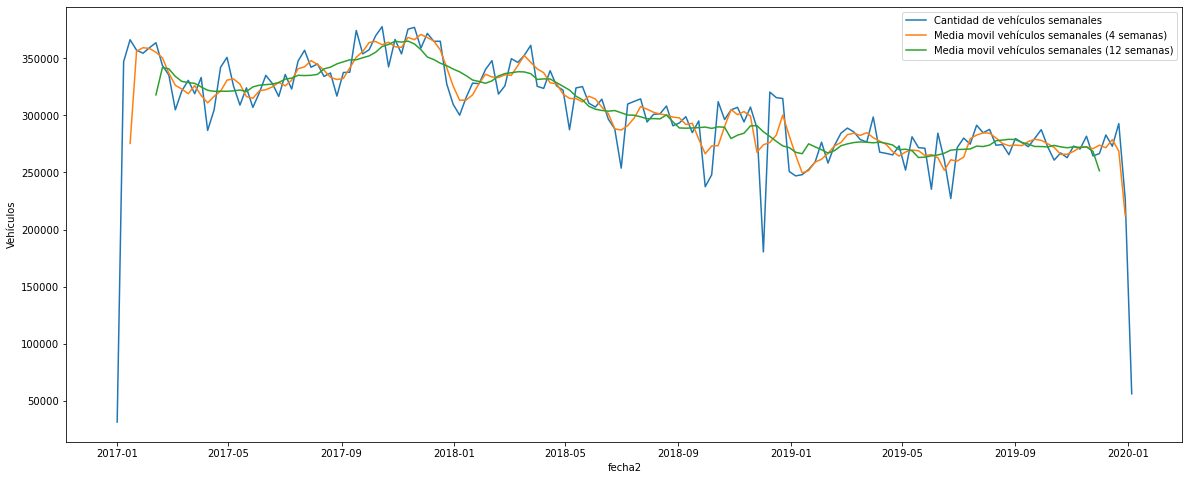

In [ ]:
# Resampleamos la señal por semanas

dataset_selection = dataset[['fecha2','cantidad_pasos']]
dataset_semanal = dataset_selection.resample('W',on='fecha2').sum()

# Utilizamos la función rolling para calcular medias móviles de distintos tamaños.

dataset_semanal_mediamovil_4 = dataset_semanal.rolling(4,center = True).mean()
dataset_semanal_mediamovil_4.name = '4 semanas'
dataset_semanal_mediamovil_12 = dataset_semanal.rolling(12,center = True).mean()
dataset_semanal_mediamovil_12.name = '12 semanas'

# Establecemos el tamaño del plot
plt.figure( figsize = ( 20, 8))
  
# Graficamos líneas utilizado seaborn

sns.lineplot(x = dataset_semanal.index,
             y = dataset_semanal['cantidad_pasos'],
             label = 'Cantidad de vehículos semanales')
  
sns.lineplot(x = dataset_semanal_mediamovil_4.index,
             y = dataset_semanal_mediamovil_4['cantidad_pasos'],
             label = 'Media movil vehículos semanales (4 semanas)')
  

sns.lineplot(x = dataset_semanal_mediamovil_12.index,
             y = dataset_semanal_mediamovil_12['cantidad_pasos'],
             label = 'Media movil vehículos semanales (12 semanas)')

plt.ylabel('Vehículos')

## Análisis de tendencia con una regresión lineal

Este método consiste  en ajustar una regresión lineal a la serie de tiempo

In [ ]:
# Hacemos un resampleo del dataset a un intervalo de tiempo diario

dataset_diario = dataset_selection.resample('D',on='fecha2').sum()
dataset_diario = dataset_diario.rename(columns={'cantidad_pasos': 'Total Vehículos Diarios'})

# Convertimos las fechas a valores numéricos

dataset_diario['fecha_numero']=dataset_diario.index.map(dt.datetime.toordinal)

# Visualizamos los números de días

dataset_diario.head()

Total Vehículos Diarios  fecha_numero
fecha2                                           
2017-01-01                    31183        736330
2017-01-02                    51568        736331
2017-01-03                    51093        736332
2017-01-04                    53332        736333
2017-01-05                    56486        736334

In [ ]:
# Desplazamos los números de día para no trabajar con valores grandes. A todos le restaremos el valor de la primer fecha

numero_fecha_min = dataset_diario['fecha_numero'][0]
dataset_diario['fecha_numero'] = dataset_diario['fecha_numero'] - numero_fecha_min

# Visualizamos nuevamente

dataset_diario.head()

Total Vehículos Diarios  fecha_numero
fecha2                                           
2017-01-01                    31183             0
2017-01-02                    51568             1
2017-01-03                    51093             2
2017-01-04                    53332             3
2017-01-05                    56486             4

In [ ]:
# Instanciamos un objeto de la clase LinearRegression
lr = LinearRegression()

# Ajustamos el modelo lineal a los datos

lr.fit(dataset_diario['fecha_numero'].values.reshape(-1, 1), dataset_diario['Total Vehículos Diarios'].values)

LinearRegression()

In [ ]:
# Visualizamos los coeficientes de la regresión lineal

print("Pendiente: ",lr.coef_[0])
print("Ordenada al origien:", lr.predict([[0]])[0])

Pendiente:  -12.80108948885733
Ordenada al origien: 50715.055311135555


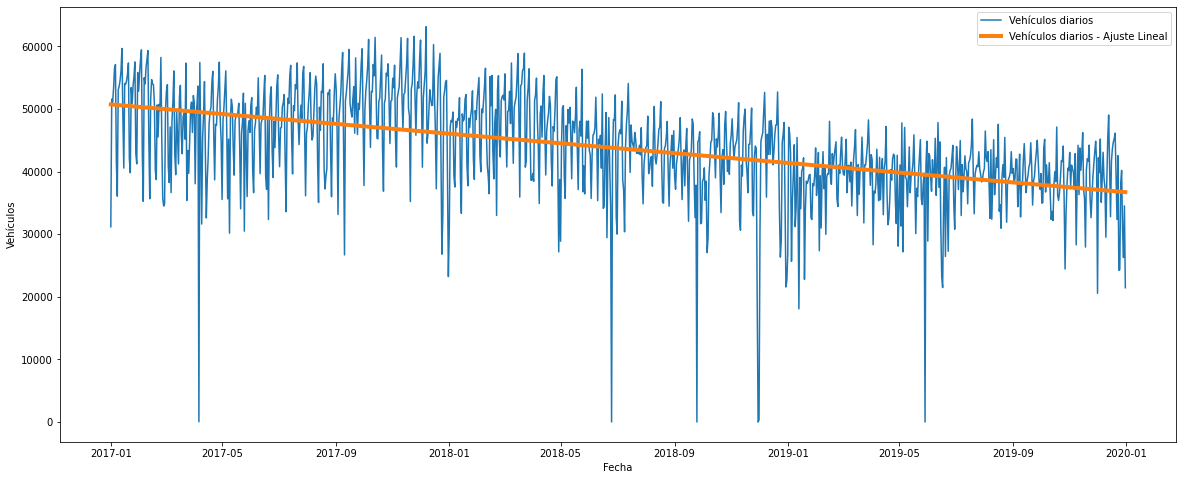

In [ ]:
# Graficamos la serie diaria con el ajuste lineal

plt.figure( figsize = ( 20, 8))
plt.plot(dataset_diario.index, dataset_diario['Total Vehículos Diarios'], label = 'Vehículos diarios')
plt.plot(dataset_diario.index, lr.predict(dataset_diario['fecha_numero'].values.reshape(-1, 1)), lw = 4, label = 'Vehículos diarios - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Vehículos')
plt.legend()
plt.show()

Se valida que se obtienen una recta con tendencia decreciente

## Obtendremos la estacionalidad con media movil 
Señal = Tendencia + Estacionalidad + Ruido 

Si a la señal le restamos la tendencia podremos ver más claramente la estacionalidad y luego el ruido

Calculamos la media movil de 4 semanas

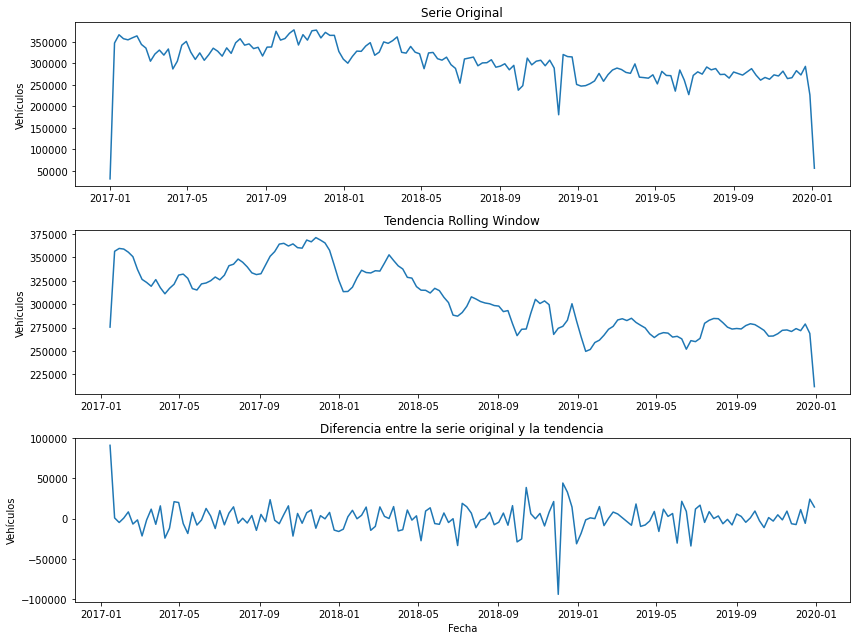

In [ ]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(dataset_semanal.index, dataset_semanal['cantidad_pasos'])
plt.ylabel('Vehículos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(dataset_semanal_mediamovil_4.index,dataset_semanal_mediamovil_4['cantidad_pasos'])

plt.ylabel('Vehículos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(dataset_semanal_mediamovil_4.index, dataset_semanal['cantidad_pasos'] - dataset_semanal_mediamovil_4['cantidad_pasos'])

plt.xlabel('Fecha')
plt.ylabel('Vehículos')

plt.tight_layout()
plt.show()



Se puede observar como se elimina la tendencia y se aprecia la estacionalidad.

Calculamos la media movil de 12 semanas

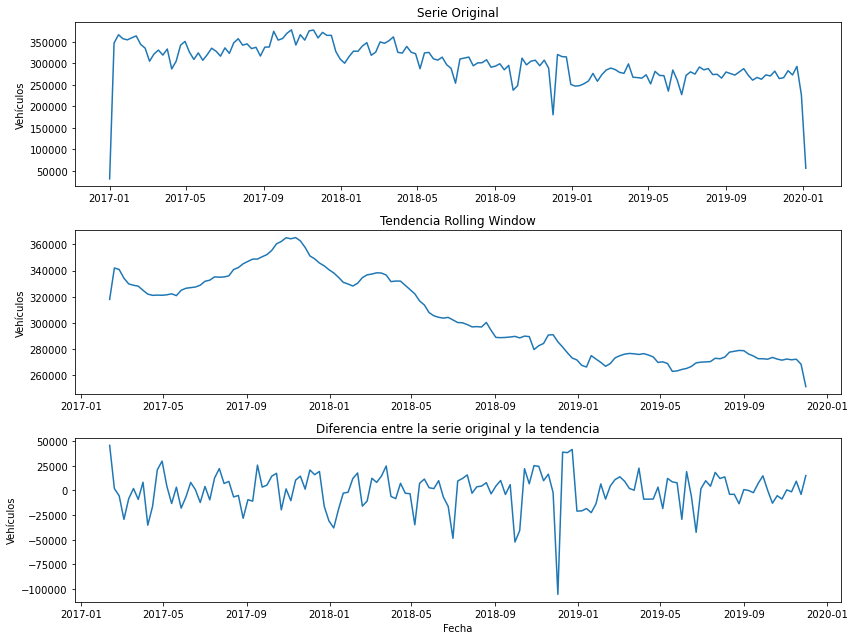

In [ ]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(dataset_semanal.index, dataset_semanal['cantidad_pasos'])
plt.ylabel('Vehículos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(dataset_semanal_mediamovil_12.index,dataset_semanal_mediamovil_12['cantidad_pasos'])

plt.ylabel('Vehículos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(dataset_semanal_mediamovil_12.index, dataset_semanal['cantidad_pasos'] - dataset_semanal_mediamovil_12['cantidad_pasos'])
plt.xlabel('Fecha')
plt.ylabel('Vehículos')

plt.tight_layout()
plt.show()

### Obtencion de la estacionalidad con recta de regresión lineal

Con las medias móviles logra removerse mejor la tendencia.

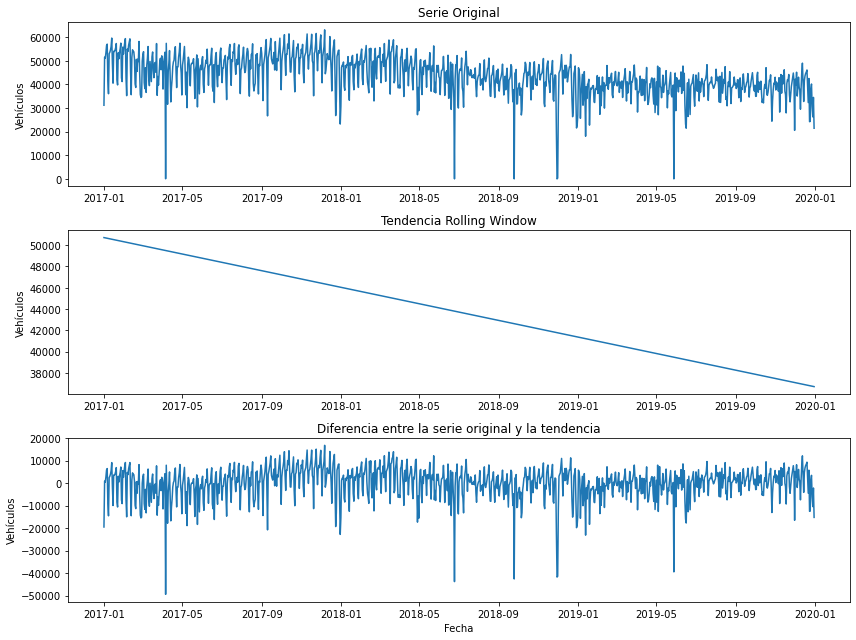

In [ ]:
# Cuidado que en este caso está hecho por día y no por semana.

plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(dataset_diario.index, dataset_diario['Total Vehículos Diarios'])
plt.ylabel('Vehículos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(dataset_diario.index,lr.predict(dataset_diario['fecha_numero'].values.reshape(-1, 1)))

plt.ylabel('Vehículos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(dataset_diario.index, dataset_diario['Total Vehículos Diarios'] - lr.predict(dataset_diario['fecha_numero'].values.reshape(-1, 1)))
plt.xlabel('Fecha')
plt.ylabel('Vehículos')

plt.tight_layout()
plt.show()

Se puede observar como se elimina la tendencia y se ve la estacionalidad, pero en este caso no es tan bueno como con la media movil

## Detección de valores atípicos

Utilizaremos la librería pycaret para facilitar el analisis. 
Los valores atípicos pueden utilizarse sobre el dataset original o sobre un resampleo. Para este analisis, detectaremos valores atípicos por día.


In [ ]:
dataset_diario = dataset[['fecha2','cantidad_pasos']].resample('D',on='fecha2').sum()
dataset_diario = dataset_diario.rename(columns={'cantidad_pasos': 'Total Vehículos Diarios'})
dataset_diario.head()

Total Vehículos Diarios
fecha2                             
2017-01-01                    31183
2017-01-02                    51568
2017-01-03                    51093
2017-01-04                    53332
2017-01-05                    56486

In [ ]:
# Utilizamos la función setup para inicializar el análisis de la señal. Le pasamos como entrada la serie de tiempo

s = setup(dataset_diario)

Existen varios modelos para analizar valores atipicos. En este caso utilizaremos "isolation forest"

In [ ]:
# Creamos el modelo
iforest = create_model('iforest', fraction = 0.1)

# Aplicamos el modelo sobre los datos
iforest_results = assign_model(iforest)

# Visualizamos los resultados
iforest_results.head()

# La columna Anomaly es booleana. Indica "1" para aquellos datos que considera atípicos y 0 para el resto.
# Además tiene un score de anomalía para que podamos evaluar que tan atípico es el valor.
# Scoring positivo (Atípico) , Scroing negativo (No Atípico)

Total Vehículos Diarios  Anomaly  Anomaly_Score
fecha2                                                     
2017-01-01                    31183        0      -0.001420
2017-01-02                    51568        0      -0.070125
2017-01-03                    51093        0      -0.076657
2017-01-04                    53332        0      -0.056170
2017-01-05                    56486        1       0.015110

La columna Anomaly es booleana. Indica "1" para aquellos datos que considera atípicos y 0 para el resto.
Además tiene un score de anomalía para que podamos evaluar que tan atípico es el valor.
Scoring positivo (Atípico) , Scroing negativo (No Atípico)

In [ ]:
# Filtrando adecuadamente sobre los resultados podremos ver los valores atípicos

iforest_results[iforest_results['Anomaly'] == 1].head()

Total Vehículos Diarios  Anomaly  Anomaly_Score
fecha2                                                     
2017-01-05                    56486        1       0.015110
2017-01-06                    57081        1       0.024727
2017-01-12                    56042        1       0.006307
2017-01-13                    59651        1       0.114473
2017-01-20                    57337        1       0.030974

In [ ]:
# Imprimimos la cantidad de valores anómalos y el % de los mismos

l = len(iforest_results[iforest_results['Anomaly'] == 1] )
n = len(iforest_results)
print("La cantidad de valores atípicos es:", l)
print("El % de valores atípicos es:", l/n * 100)

La cantidad de valores atípicos es: 110
El % de valores atípicos es: 10.045662100456621


Obtenemos de este analisis que existe un 10% de los valores que esrian anomalos. Como este valor es muy alto y hay valroes de scoring que son positivos pero cercanos a 0, decido evaluar con una condicion de scoring superior a 0.1

In [ ]:
# Imprimimos la cantidad de valores atípivod y el % con una condición de scoring superior a 0.1

l = len(iforest_results[(iforest_results['Anomaly'] == 1) & (iforest_results['Anomaly_Score'] > 0.1)])
n = len(iforest_results)
print("La cantidad de valores atípicos es:", l)
print("El % de valores atípicos es:", l/n * 100)

La cantidad de valores atípicos es: 33
El % de valores atípicos es: 3.0136986301369864


Obtenemos asi un 3% de valores atipicos. Evaluaremos en la grafica debajo si es neceario ajustar el filtrado.

In [ ]:
# Guardamos los valoreos atípicos para graficarlos

outliers = iforest_results[(iforest_results['Anomaly'] == 1) & (iforest_results['Anomaly_Score'] > 0.1)]

In [ ]:
# Visualizaremos los outliers en un gráfico

# Gráfica de eje x y eje y

fig = px.line(iforest_results, x=iforest_results.index, y="Total Vehículos Diarios", title='Total de Vehículo Diarios - Detección de Valores Atípicos')

# Creamos lista de fechas donde están los valores atípicos (en este caso son días)
outlier_dates = outliers.index

# Graficamos los valores atípicos sobre el mismo plot

y_values = [iforest_results.loc[i]['Total Vehículos Diarios'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', name = 'Anomaly', marker=dict(color='red',size=10)))
        
fig.show()

De este analisis, concluyo la serie posee valores atipicos.

## Correlación entre dos series de tiempos

### Correlación de pearson

In [ ]:
# Obtenemos dos dataframes cantidad de vehículos en sentido centro y en sentido provincia

# Filtramos por sentido
dataset_centro = dataset[dataset['sentido']=='Centro']
dataset_provincia = dataset[dataset['sentido']=='Provincia']

# Resampleamos por semana. Obtendremos la misma cantidad de registros.
dataset_centro_semanal = dataset_centro[['fecha2','cantidad_pasos']].resample('W',on='fecha2').sum()
dataset_provincia_semanal = dataset_provincia[['fecha2','cantidad_pasos']].resample('W',on='fecha2').sum()

In [ ]:
r, p = stats.pearsonr(dataset_centro_semanal['cantidad_pasos'], dataset_provincia_semanal['cantidad_pasos'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.9505150355706946 and p-value: 4.236329046632971e-81


Como puede verse están altamente correlacionadas

## Cross Correlation (Correlación con desplazamiento temporal)

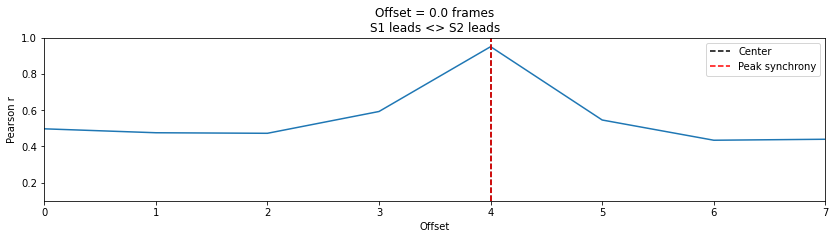

In [ ]:
#Armamos la funcion que nos permita efectuar el analisis

def crosscorr(datax, datay, lag=0, wrap=False):
   
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))


window_size = 4
rs = [crosscorr(dataset_centro_semanal['cantidad_pasos'],dataset_provincia_semanal['cantidad_pasos'], lag) for lag in range(-window_size,window_size)]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,1],xlim=[0,window_size*2-1], xlabel='Offset',ylabel='Pearson r')
plt.legend()

A partir del analisis, se concluye que ambas selales estan correlacionadas en el instante de tiempo inicial.

## Autocorrelación (Correlación en una serie de tiempo)

Dada una serie de tiempo se busca la correlación de los valores de la serie con valores anteriores de la misma (autocorrelación).O bien, dadas dos series de tiempo se busca si están correlacionadas como si se se tratase de dos variables por separado. 


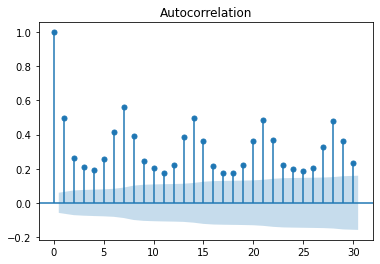

In [ ]:
# Obtenemos datos diarios

dataset_selection = dataset[['fecha2','cantidad_pasos']]
dataset_diario = dataset_selection.resample('D',on='fecha2').sum()

# A continuación haremos un gráfico de autocorrelación

plot_acf(dataset_diario['cantidad_pasos'], lags=30)
pyplot.show()

# La variable lag indica con cúantos valores anteriores hará la correlación.
# En la posición 0 la correlación siempre será 1 ya que se está comparando contra si mismo
# Todo elemento está perfectamente correlacionado con si mismo.

Del correlograma diario obtenido, se concluye que cada dia de la semana esta correlacionado con el mismo dia de la semana anterior. Probaremos ahora debajo con meses y trimestres

In [ ]:
# Resampleamos la señal por meses

dataset_selection = dataset[['fecha2','cantidad_pasos']]
dataset_mensual = dataset_selection.resample('M',on='fecha2').sum()

# Utilizamos la función rolling para calcular media móvil

dataset_mensual_mediamovil = dataset_mensual.rolling(3).mean()
dataset_mensual_mediamovil.name = '1 mes'

In [ ]:
dataset_dif= dataset_mensual['cantidad_pasos'] - dataset_mensual_mediamovil['cantidad_pasos']

In [ ]:
dataset_dif=dataset_dif[5:]

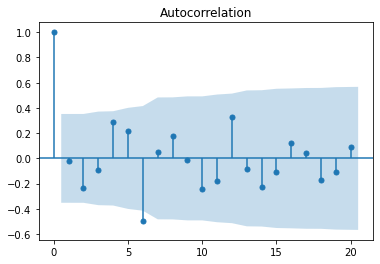

In [ ]:
# A continuación haremos un gráfico de autocorrelación

plot_acf(dataset_dif, lags=20)
pyplot.show()

# Modelos para predicciones

Intentaremos explicar el dato en un instante de tiempo (en escalas: día, semana, mes, trimestre, etc) en función de instantes anteriores.

## ARIMA - Modelo de Benchmark 

In [ ]:
#Separamos en train y test
train=dataset_mensual.iloc[:-90]
test=dataset_mensual.iloc[-90:]

In [ ]:
model=ARIMA(dataset_mensual['cantidad_pasos'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         cantidad_pasos   No. Observations:                   36
Model:                     ARMA(1, 5)   Log Likelihood                -455.130
Method:                       css-mle   S.D. of innovations          68004.278
Date:                Mon, 20 Sep 2021   AIC                            926.260
Time:                        22:14:05   BIC                            938.928
Sample:                    01-31-2017   HQIC                           930.682
                         - 12-31-2019                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.33e+06   7.95e+04     16.733      0.000    1.17e+06    1.49e+06
ar.L1.cantidad_pasos     0.7844      0.177      4.421      0.000       0.437       1.132
ma.L1.cantidad_pasos    -0.2111      0.288     -0.732      0.464      -0.776       0.354
ma.L2.cantidad_pasos     0.5799      0.202      2.873      0.004       0.184       0.976
ma.L3.cantidad_pasos    -0.4521      0.333     -1.359      0.174      -1.104       0.200
ma.L4.cantidad_pasos     0.5196      0.221      2.354      0.019       0.087       0.952
ma.L5.cantidad_pasos     0.2802      0.277      1.010      0.312      -0.263       0.824
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2748           +0.0000j            1.2748            0.0000
MA.1            0.8458           -0.7501j            1.1305           -0.1155
MA.2            0.8458           +0.7501j            1.1305            0.1155
MA.3           -0.3772           -0.9263j            1.0002           -0.3116
MA.4           -0.3772           +0.9263j            1.0002            0.3116
MA.5           -2.7914           -0.0000j            2.7914           -0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='fecha2'>

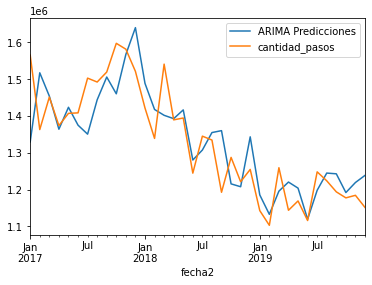

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predicciones')
pred.plot(legend=True)
test['cantidad_pasos'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['cantidad_pasos'].mean()
rmse=sqrt(mean_squared_error(pred,test['cantidad_pasos']))
print('RMSE Benchmark=',rmse)

RMSE Benchmark= 82083.80702942306


Aqui tenemos nuestro modelo de Benchmark cuyo RMSE es 82083. Implementaremos a continuacion el modelo de RandomForest en sus 2 versiones, One Step y Multi Step

### Predicción de un paso usando Randomforest

One-Step Prediction

Vamos a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo semanal. Utilizaremoso el 80% de las semanas como entrenamiento y el 20% para evaluación de las predicciones.

In [ ]:
# Obtenemos los datos semanales

dataset_semanal = dataset[['fecha2','cantidad_pasos']].resample('W',on='fecha2').sum()

# Indicamos la cantidad de valores anteriores que utilizaremos para predecir el siguiente valor.
# Por ejemplo, intentaremos predecir el tráfico de una semana, conociendo lo que sucedió en todas las semanas del año anterior.
# Consideramos que un año tiene 52 semanas

look_back = 52

# Ahora armamos la estructura donde vamos a poner los datos

N = dataset_semanal.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

In [ ]:
# Verificamos los shapes

print(dataset_semanal.shape[0])
print(X.shape)
print(y.shape)

158
(105, 52)
(105,)


In [ ]:
## Llenamos de datos

for i in range(X.shape[0]):

    X[i,:] = dataset_semanal['cantidad_pasos'].iloc[i:i+look_back]
    y[i] = dataset_semanal['cantidad_pasos'].iloc[i+look_back]

In [ ]:
# Visualizamos los valores cargados

# X representa nuestra variables independientes 52
# y la variable dependiente 1 (semana 53)

print(X)

[[ 31183. 347212. 366413. ... 364991. 365063. 327602.]
 [347212. 366413. 357215. ... 365063. 327602. 309692.]
 [366413. 357215. 354581. ... 327602. 309692. 300242.]
 ...
 [315645. 314832. 250861. ... 264500. 266555. 282891.]
 [314832. 250861. 246994. ... 266555. 282891. 272960.]
 [250861. 246994. 248077. ... 282891. 272960. 292881.]]


In [ ]:
# Para cada tira de valores de X hay un valor de y.
# Esto representa para los datos de 52 semanas (X) qué valores le corresponde a la semana 53 (y)

print(y)

[309692. 300242. 315780. 328359. 327887. 340275. 348044. 318733. 325966.
 349768. 346506. 352713. 361465. 325545. 323725. 339255. 325904. 322154.
 287470. 324115. 325304. 310709. 307369. 314291. 296834. 288154. 253807.
 310012. 312335. 314517. 294270. 300955. 301407. 308307. 290940. 293436.
 298932. 284913. 295210. 237507. 247986. 312089. 296381. 304897. 307134.
 294310. 307352. 288934. 180328. 320481. 315645. 314832. 250861. 246994.
 248077. 252617. 259019. 276568. 258204. 273664. 284439. 288919. 285547.
 278834. 276714. 298638. 267797. 266745. 265423. 273282. 252104. 281283.
 271796. 271232. 235301. 284432. 260940. 227123. 271865. 280160. 274852.
 291431. 284822. 287773. 273867. 274513. 265594. 279775. 276271. 272592.
 279927. 287568. 272483. 260840. 267147. 262950. 273129. 270536. 281790.
 264500. 266555. 282891. 272960. 292881. 226390.]


In [ ]:
# Definimos set de entrenamiento y de test

# Cantidad que vamos a utilizar para entrenar
N_train = int(0.8*len(y))

# Cantidad que vamos a usar para evaluar
N_test = int(0.2*len(y))

# Asignamos los datos a su correspondiente dataset

X_train = X[:N_train,:]
y_train = y[:N_train]

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]

In [ ]:
# Validamos los shapes del dataset de entrenamiento y el de evaluación

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(84, 52) (84,)
(21, 52) (21,)


In [ ]:
# Importamos librerías

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Instanciamos modelo de RF y entrenamos con los datos

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

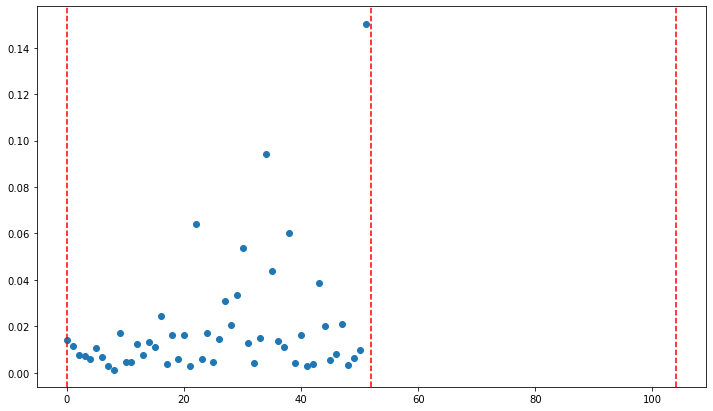

In [ ]:
# Graficamos importancia de cada feature

plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

# Puede verse que la que mayor correlación tiene es el dato LA SEMANA ANTERIOR.
# El resto no parece tener mucha relevancia salvo algunas semanas puntuales.

In [ ]:
# Hacemos predicciones aplicando el modelo de random forest

# Predicción utilizando todo el conjunto de datos
y_pred = rf.predict(X)

# Predicción para el dataset de entrenamiento. El cual usó para aprender
y_train_pred = rf.predict(X_train)

# Predicción para el dataset de evaluación. Son datos que nunca vió. Acá es donde realmente se pone a prueba el modelo
y_test_pred = rf.predict(X_test)

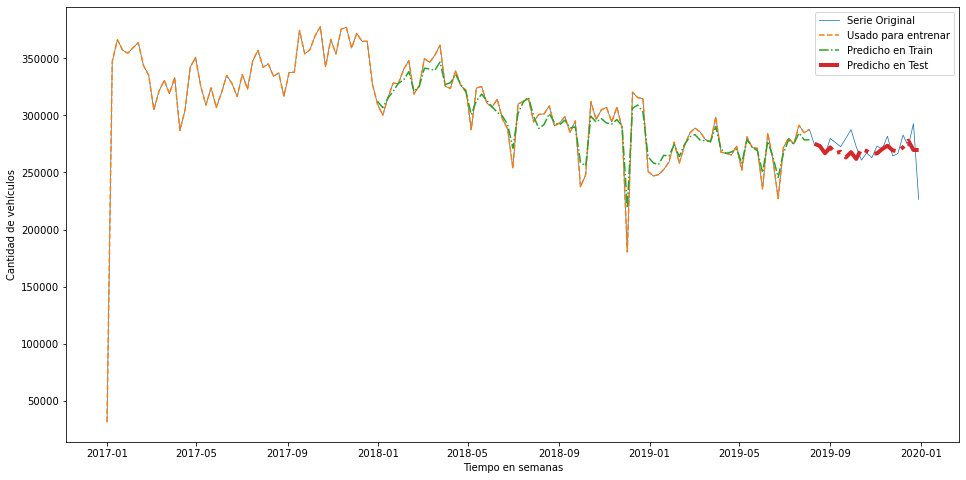

In [ ]:
# El largo total del gráfico incluirá lo que utilizamos para entrenar, evaluar, y las últimas 52 muestras se la serie que no se pudieron utilizar porque no había otro siguiente

length_total = N_train + N_test + look_back

plt.figure(figsize=(16,8))

# Ploteamos serie original (longitud total de la serie)
plt.plot(dataset_semanal.index[:length_total], dataset_semanal[:length_total],lw = 0.75, label = 'Serie Original')

# Ploteamos valores que usamos para entrenar. QUEDA SUPERPUESTA CASI TODO CON LA PRIMER SERIE SALVO LA ÚLTIMA PARTE (ver color azul)
plt.plot(dataset_semanal.index[:N_train + look_back], dataset_semanal[:N_train + look_back],'--', label = 'Usado para entrenar')

# Ploteamos valores predichos en la parte del entrenamiento
plt.plot(dataset_semanal.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')

# Ploteamos valores predichos para la parte de evaluación
plt.plot(dataset_semanal.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo en semanas')
plt.ylabel('Cantidad de vehículos')
plt.show()

# El modelo se evaluá sobre la diferencia entre lo predicho para test y la derie original (diferencia rojo con azul)

In [ ]:
# Para complementar la predicción visual complementamos con el cálculo del RMSE para train y para test

MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 8915.272851470218
Error en Test: 13379.347520090341


### Predicción multipaso usando Randomforest (Multi-Step prediction)

A diferencia del caso anterior. A medida que predice un valor, lo utiliza como entrada de la predicción siguiente. 

Por ejemplo, si utiliza los datos desde la semana 1 hasta la 52 para predecir la semana 53. Luego utilizará desde la semana 2 hasta la 53 (valor predicho) para predicir la semana 54.

La desventaja de este approach es que irá acumulando los errores de cada predicción dado que se irá propagando a las siguientes. 

Vamos a utiliar el modelo de randomforest que ya tenemos entrenado

In [ ]:
# Tomamos únicamente como entrada los valores correspondientes a las primeras 52 semanas.
# El resto se irán calculando con la propia predicción del modelo

# Definimos nuestro vector de entrada "x" como el primer elemento de nuestro dataset de evaluación
# [0,:] Indica que copiamos todas las columnas de la primera fila

x = X_test[0,:] 

# Inicializamos una lista de predicciones

y_ms_test_pred = []

# Y ahora vamos recorriendo y haciendo las predicciones

for i in range(y_test.size):

    y_os_pred = rf.predict(x.reshape(1,-1)) #reshape para que lo tome como entrada el modelo
    y_ms_test_pred.append(y_os_pred) #agregamos el valor predicho a nuestra lista de predicciones
    x = np.append(x[1:], y_os_pred) # actualizamos nuestro "x" sacando el primer elemento e incorporando el valor predicho

# Convertirmos a array la lista
y_ms_test_pred = np.array(y_ms_test_pred)

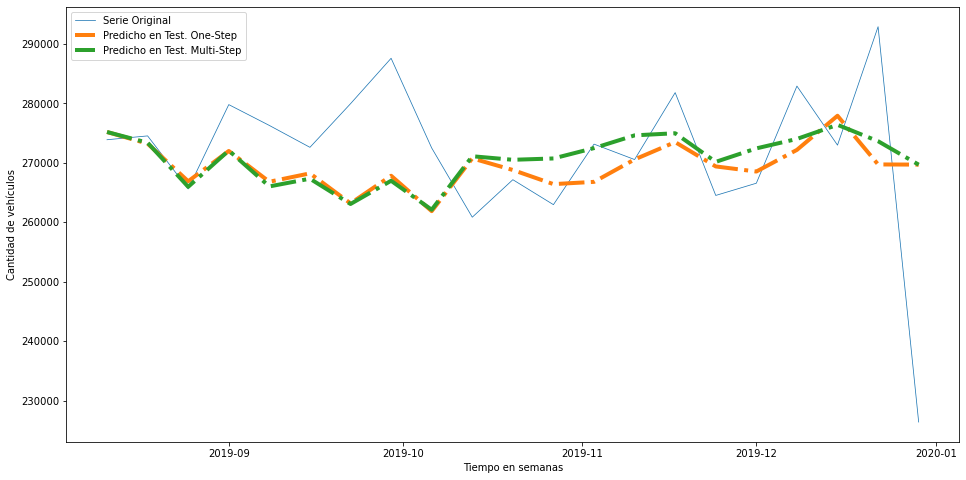

In [ ]:
# Volvemos a hacer las gráficas anteriores pero solo para el útimo tramo donde usamos la predicción multipaso.
# Además comparamos con la de paso simple.

plt.figure(figsize=(16,8))
plt.plot(dataset_semanal.index[N_train+look_back: length_total], dataset_semanal[N_train+look_back: length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dataset_semanal.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test. One-Step')
plt.plot(dataset_semanal.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo en semanas')
plt.ylabel('Cantidad de vehículos')
plt.show()


In [ ]:
# Son bastante parecidas. Calculamos el RMSE para hacer una comparación más objetiva

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test One-Step:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test Multi-Step:',np.sqrt(MSE))

# Tienen un error en el mismo orden de magnitud.

Error en Test One-Step: 13379.347520090341
Error en Test Multi-Step: 13190.74997062336


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculamos MAE, MAPE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print('MAE: Error aboluto promedio ONE STEP %.3f' % mae)
print('MAPE: Error relativo (porcentual) promedio ONE STEP %.2f' % mape)

mae = mean_absolute_error(y_test, y_ms_test_pred)
mape = mean_absolute_percentage_error(y_test, y_ms_test_pred)

print('MAE: Error aboluto promedio MULTI STEP %.3f' % mae)
print('MAPE: Error relativo (porcentual) promedio MULTI STEP %.2f' % mape)

MAE: Error aboluto promedio ONE STEP 9110.472
MAPE: Error relativo (porcentual) promedio ONE STEP 3.44
MAE: Error aboluto promedio MULTI STEP 9199.790
MAPE: Error relativo (porcentual) promedio MULTI STEP 3.52


**Conclusion**: el modelo de Benchmark tiene un RMSE de cerca de 80000. Es posible predecir la cantidad de autos que pasaron por el peaje de la autopista Illia en el ultimo trimestre de 2019. De los 2 modelos analizados, el de multi-step posee un error menor, por lo cual recomiendo que se lo utlice por sobre el de one-step.

### INVESTIGACION - Proximo proyecto

En el proximo proyecto utilizaré la libreria Prophet, que fue desarrollada recientemente por Facebook, para poder predecir el flujo vehicular en el ultimo trimestre de 2019 (https://facebook.github.io/prophet/). En el desarrollo de este notebook se detectaron outliers en la serie de tiempo, pero estos no fueron tratados. Me propongo implementar un metodo de tratamiento de los mismos para eliminarlos como tales y reemplazar su valor por uno apropiado para que la serie siga siendo continua. 

Por otro lado, compararé si la tendencia es la misma para transporte pesado y transporte liviano. Es decir, los que cambiaron al metodo de pago telepase fueron todso los autos(livianos), o también los camiones(pesados)?
Asimismo, me propongo analizar si la caida en el metodo de pago de tipo efectivo en la autopista Illia, se corresponde con un crecimiento a algun otro metodo de pago

**Resultados esperados**

Como resultados espero obtener una menor error de RMSE en la predicción utilizando la libreria Prophet, beneficiado a su vez por la eliminacion de valores atipicos en la serie de tiempo, que el alcanzado con los modelos de Random Forest descriptos anteriormente.
<br>
<br>
Con respecto a la caida en el metodo de pago de tipo efectivo en la autopista Illia, espero que se corresponda con un incremento en el tipo de pago Telepase.